In [106]:
import os
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib 
import pandas as pd
%matplotlib inline

In [115]:

def draw_pattern(pattern,colors,size=10):
    n_rows = len(pattern)
    n_cols = len(pattern[0])
    image = Image.new('RGB',(n_cols*size,n_rows*size),(0,0,0))
    for r in range(n_rows):
        for c in range(n_cols):
            color_code = pattern[r][c]
            color = colors.get(color_code,(0,0,0))
            block = Image.new('RGB',(size,size),color)
            image.paste(block,(c*size,r*size))
    return image

def resize(im,scale=2):
    w,h = im.size
    im_resized = Image.new('RGB',(w*scale,h*scale),(0,0,0))
    for x in range(w):
        x0 = x*scale
        x1 = (x+1)*scale
        for y in range(h):
            y0 = y*scale
            y1 = (y+1)*scale
            color = im.getpixel((x,y))
            for xx in range(x0,x1):
                for yy in range(y0,y1):
                    im_resized.putpixel((xx,yy),color)
    return im_resized

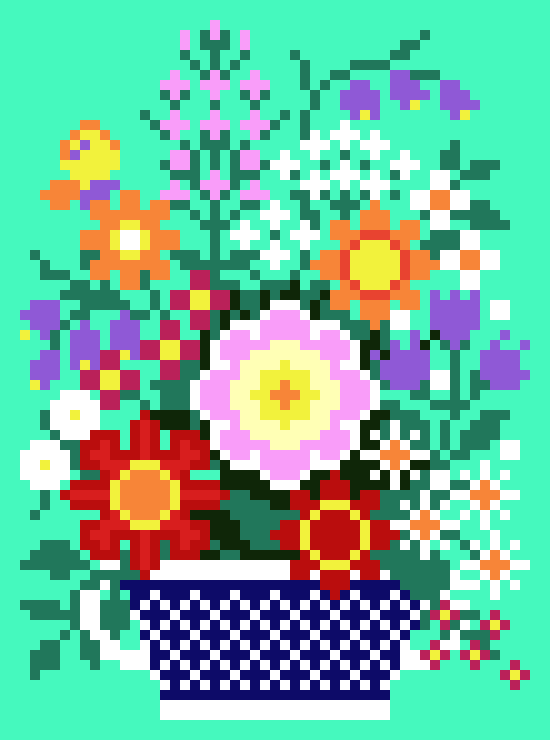

In [59]:
pattern = '''
_______________________________________________________
_______________________________________________________
_____________________c_________________________________
__________________c_bcb_c_________________b____________
__________________c_bbb_c_______________bb_____________
__________________b__b__b____b_________bb______________
___________________b_b_b______b____bbbb________________
_________________c__bcb__c____b__bb____ddbbb___________
________________ccc_ccc_ccc___b_b__dd__ddd__dd_________
________________bcb__c__bcb____b__dddd_dddd_ddd________
_________________b___b___b_____b__dddd__de__dddd_______
______________b__c___c___c__b_b____ded_______de________
________gg_____bccc_ccc_cccb__b___f____________________
_______geeg_____bc__bcb__cb___bf_fff_f_________________
______gedeeg______b_bbb_b_____fff_f_fff______b_________
______gdeeee_____ccb_b_bcc__f__f__b__f__f___bb_________
______eeeeee____bccb_b_bccbfff__b_f_b__fff__bb_bbb_____
_______eeee______bbb_c_bbb__fb_f_fff_f_bf__ff_bbb______
_____gggeddd_____c_bcccb_c____fff_f_fff____ffb_________
____ggggddd_gg__ccc_bcb_ccc__bbfb_b_bf_b_ffggff________
_____gg_dgg_gg_ggbb__b__bb_f__b__bbb_g___ffggffbb______
_________gggggggg__b_b_b__fff_bb__b_ggg___bffbbbbb_____
__________ggeegg____bbb_f__f__fb_gg_ggg_gg_ff__bbbb____
________gggeffeggg___b_fff_b_fff_ggghhhggg_bbbff_______
________gggeffeggg___b__f__f__f___gheeehg_bbbbff_______
___b____bbggeegg_bbb_b_bbbfff_b_ggheeeeehggbffggff_____
____b___bgggggggg_bbbbbbb__f__bgggheeeeehgggffggff_____
____bbb__gg_ggbgg__iib___b___b__ggheeeeehgg___ff_______
_______bb_b_ggb____iibbb__bbbm_bb_gheeehg_____ff_______
______bbbbbb___b_iieeiimbbmbmmbbmggghhhggg_d_d_d_______
___ddd__bbbbb__b_iieeiimbbmfffbmbgg_ggg_gg_ddddd_ff____
__dddd_bb___dbb_b__iibmbmbfcccfmbbb_gggff__ddddd_ff____
___dddb_d__ddd__ii_iibmfffcccccfffbbbgbff__ddddd_______
__e_db_ddd_ddd__ii__mbfccfcccccfccfbbmb__d_mddd___d____
_____b_ddd_dddiieeiimfcccccnnncccccfmmbd_dm_bdb__d__d__
____dd_dddiiediieeiimfcccnnnnnnncccfmdmdddd__b__dddd___
___ddd_dedii____iibbmffcnnnnennnncffmbddddd__b__dddd___
___ddd__iieeii__iibbfcccnneeeeenncccfbdddddffb_bddddd__
___ed___iieeii_bbbbfcccnnneegeennncccfbdddbffb_bbddd___
______fff_iibb__bbbfcccnneegggeenncccf___bb__b_b_______
_____fffffii__b_bbbfcccnnneegeennncccfbb___bbbb________
____bffeff____kmmmmbfcccnneeeeenncccfmmbbb___b__bbb____
____bfffff___klkmmmbmffcnnnnennnncffmmbfbbb_b__bbb_____
_____bfffkkk_klk_kkkmfcccnnnnnnncccfmfbfbfb_b_bbbb_____
___fffbbkklk_klk_klkkfcccccnnncccccfmmfgfbb_b_bbb_ff___
__fffffbkllkkklkkkllkmfccfcccccfccfmffgggffb_bb___ff___
__ffeffbkkllleeelllkkbmfffcccccfffmmmmfgfmmbb___f______
__fffff_bbklegggelk___mmmmfcccfmmkmmmfmfmfbff_f_f_f____
___fff_kkkkegggggekkkkmmmmmfffmmkkkmmmmfmbbffbbfgf_____
____b_kllllegggggellllkbbmmmmkkmkkkmkkbbbbfbbffgggff___
____b__kkkkegggggekkkkbbbbbmmkkkeeekkkbbfbfbf__fgf_____
___b______klegggelkmmmmbbbbbbbkekkkekbbbbfgf__f_f_f____
________kkllleeelllkkmmmbbbbkkekkkkkekkffgggff__f______
________kllkkklkkkllkmmmbbbkkkekkkkkekkkbfgfbb___f_____
____bbb_kklk_klkbklkkbmmmbbbkkekkkkkekkbfbf_f_bf_f_f___
___bbbbb_kkkbklkbkkkmmbbmmmmmmkekkkekbbbbbfb___bfgf____
__bbbbbbb_ffbklkfffffffffffffkkkeeekkkbbbbbbb_ffgggff__
_____bb__bbbbbkffffffffffffffkkfkkkfkkfbbbbbbf__fgf____
________bbfbjjjjjjjjjjjjjjjjjjjjkkkjjjjjbbbbbfff_f_f___
_______bff_b_jjfjjjfjjjfjjjfjjjfjkjfjjjfjbbbf____f_____
__bbbb_bffbbbjfjfjfjfjfjfjfjfjfjfjfjfjfjfjfbiff________
___bbbbbffbbbfjjjfjjjfjjjfjjjfjjjfjjjfjjjfbieibb_i_____
_______bffbbb_fjfjfjfjfjfjfjfjfjfjfjfjfjfjb_ibf_iei____
______b_bffb__jfjjjfjjjfjjjfjjjfjjjfjjjfj___bfbbbi_____
____bb__bbff__fjfjfjfjfjfjfjfjfjfjfjfjfjf__iff_ib______
___bbb__bbfffffjjfjjjfjjjfjjjfjjjfjjjfjjffiei_ieib_____
___bbb___b__fffjfjfjfjfjfjfjfjfjfjfjfjfjfffi___i___i___
___b___________fjjjfjjjfjjjfjjjfjjjfjjjf__________iei__
________________fjfjfjfjfjfjfjfjfjfjfjf____________i___
________________jjjjjjjjjjjjjjjjjjjjjjj________________
________________fffffffffffffffffffffff________________
________________fffffffffffffffffffffff________________
_______________________________________________________
_______________________________________________________
'''.split('\n')[1:-1]

colors = {}
colors['_'] = (69, 249, 190) # light green 
colors['b'] =(33, 119, 91) # dark green
colors['c'] = (249, 157, 249) # pink
colors['d'] = (143, 89, 214) # violet
colors['e'] = (242, 242, 60) # yellow
colors['f'] = (255, 255, 255) # white
colors['g'] = (247, 133, 56) # orange
colors['h'] = (232, 67, 48) # bright red
colors['i'] = (186, 33, 89) # magenta
colors['j'] = (13, 11, 104) # dark blue
colors['k'] = (186, 13, 13) # dark red
colors['l'] = (216, 30, 30) # red
colors['m'] = (15, 38, 8) # dark green
colors['n'] = (255, 255, 181) # cream

draw_pattern(pattern,colors)

In [72]:
#Image.open('flowers.jpg')

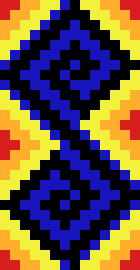

In [92]:
pattern = '''
aabbccedccbbaa
abbccedddccbba
bbcceddeddccbb
bcceddeeeddccb
cceddeedeeddcc
ceddeedddeeddc
eddeeddeddeedd
ddeeddeddeeddc
eddeeddeeeddcc
ceddeeddeddccb
cceddeedddccbb
bcceddeedccbba
bbcceddeccbbaa
abbcceddeccbba
aabbcceddeccbb
abbccdeeddeccb
bbccdddeeddecc
bccddeddeeddec
ccddeeeddeedde
cddeeddeddeedd
ddeeddeddeedde
cddeedddeeddec
ccddeedeeddecc
bccddeeeddeccb
bbccddeddeccbb
abbccdddeccbba
aabbccedccbbaa
'''.split('\n')[1:-1]

colors = {}
colors['a'] = (216, 30, 30) # red
colors['b'] = (255, 175, 45) # orange
colors['c'] = (242, 242, 60) # yellow
colors['d'] = (0, 0, 0) # black
colors['e'] = (22, 20, 186) # dark blue
draw_pattern(pattern,colors)

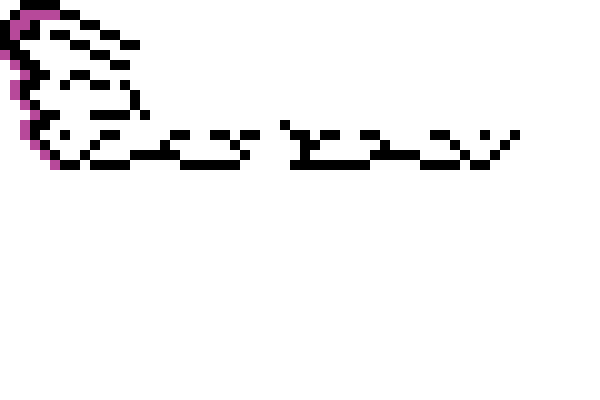

In [98]:
pattern = '''
__aaaa______________________________________________________
_abbbbaa____________________________________________________
abba____aa__________________________________________________
abaa_aa___aa________________________________________________
aa_____aa___aa______________________________________________
baa______aa_________________________________________________
_baa_______aa_______________________________________________
__baa__aa___________________________________________________
_baa__a__aa_a_______________________________________________
_ba__________a______________________________________________
__ba_________a______________________________________________
___baa___aaaa_a_____________________________________________
__baa_______________________a_______________________________
__ba__a___aa_____aa__aa_aa___aa_aa__aa_____aa___a__a________
___ba____a______a______a______aa______a______a____a_________
____ba__a____aaaaa______a_____a______aaaaa____a__a__________
_____baa_aaaa_____aaaaaa_____aaaaaaaa_____aaaa_aa___________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
____________________________________________________________
'''.split('\n')[1:-1]

colors = {}
colors['_'] = (255, 255, 255) # white
colors['a'] = (0,0,0) # black
colors['b'] = (147, 50, 112) # magenta
colors['c'] = (35, 126, 223), # bright blue
colors['d'] = (170, 174, 177) # grey
colors['e'] = (42, 41, 110) # dark blue
colors['f'] = (159, 192, 229) # light blue



colors = [(0,0,0), # black
         (255,255,255), # white
         
         
         ]
draw_pattern(pattern,colors)

(1176, 889)


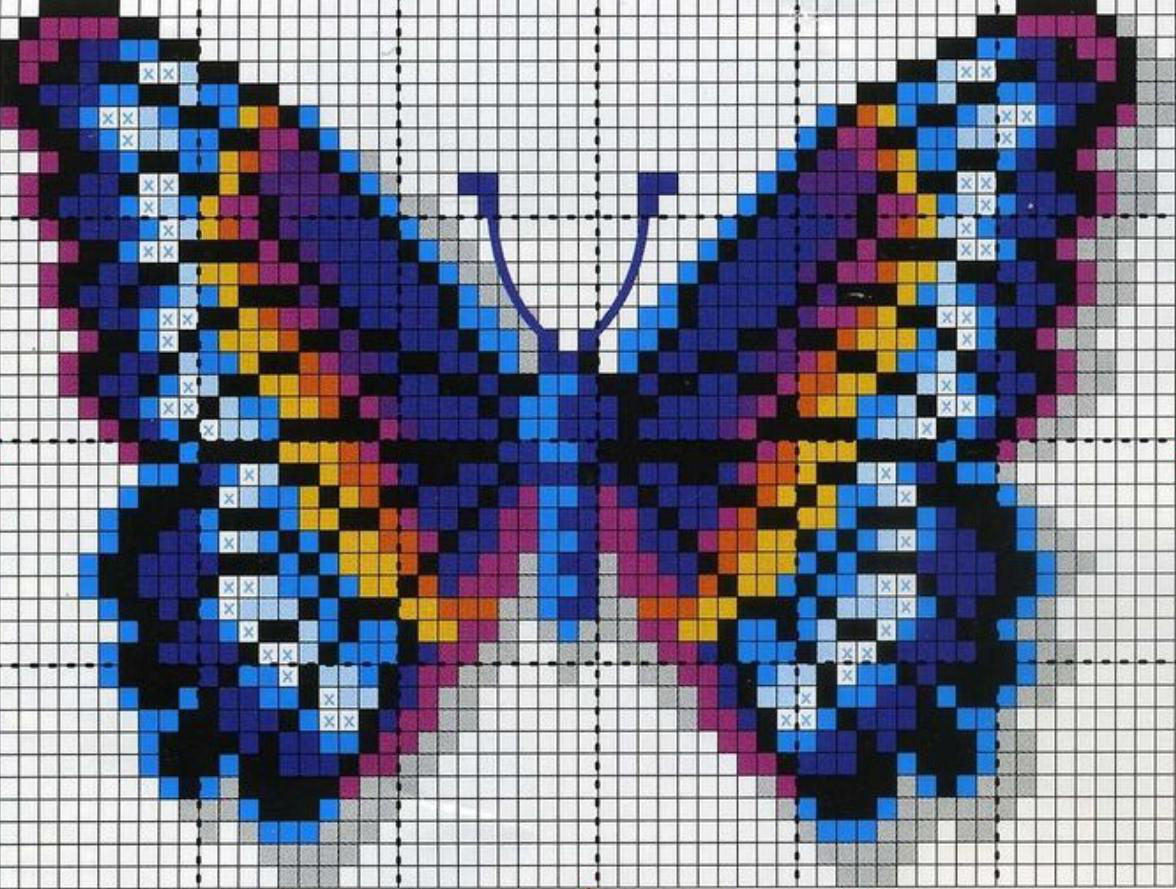

In [123]:
image = Image.open('butterfly.jpg')
print(image.size)
image

In [124]:
# slice image into blocks
blocks = []
new_size = (60,40)
for x in range(new_size[0]):
    x0 = int((x/new_size[0])*image.size[0])
    x1 = min(image.size[0], int(((x+1)/new_size[0])*image.size[0])-1)
    for y in range(new_size[1]):
        y0 = int((y/new_size[1])*image.size[1])
        y1 = min(image.size[1], int(((y+1)/new_size[1])*image.size[1])-1)
        blocks.append({'x':x,'y':y,'xyxy':(x0,y0,x1,y1)})
blocks = pd.DataFrame(blocks)
blocks.head()

,x,xyxy,y
0,0,"(0, 0, 18, 21)",0
1,0,"(0, 22, 18, 43)",1
2,0,"(0, 44, 18, 65)",2
3,0,"(0, 66, 18, 87)",3
4,0,"(0, 88, 18, 110)",4


In [148]:
# get average color in center of each block
def average_color(block):
    data = list(block.getdata())
    return tuple([round(sum([x[i] for x in data])/len(data)) for i in range(3)])

blocks['avg_color'] = blocks.apply(lambda r: 
                                   average_color(image.crop(r['xyxy']).crop((5,5,10,10))),axis=1)
blocks.head()

,x,xyxy,y,avg_color
0,0,"(0, 0, 18, 21)",0,"(252, 252, 252)"
1,0,"(0, 22, 18, 43)",1,"(243, 243, 243)"
2,0,"(0, 44, 18, 65)",2,"(20, 29, 21)"
3,0,"(0, 66, 18, 87)",3,"(23, 22, 20)"
4,0,"(0, 88, 18, 110)",4,"(20, 25, 18)"
